<a href="https://colab.research.google.com/github/PunithKumarR/ML_Projects-/blob/main/Chennai_house_sales_prediction_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor


Loading the Dataset

In [2]:
df=pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


checking the how many rows and columns are there in dataset

In [3]:
df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

Removing the UnNecessary Columns

In [5]:
df.drop(df.columns[[0,19,20]],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [6]:
df.shape

(7109, 19)

Checking the Missing Values

In [7]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

imputing the missing values

In [8]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [9]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean(),inplace=True)


In [10]:
df.N_BEDROOM.isnull().sum()

0

In [11]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean(),inplace=True)

In [12]:
df.N_BATHROOM.isnull().sum()

0

In [13]:
df.QS_OVERALL.values[0]

4.33

In [14]:
df.QS_OVERALL.fillna(df['QS_OVERALL'].mean(),inplace=True)

In [15]:
df.QS_OVERALL.isnull().sum()

0

In [16]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

Removing the duplicates

In [17]:
df = df.drop_duplicates()
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


checking datatypes

In [18]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

Updating unproper datatype to proper datatype format

In [19]:
df['DATE_SALE']=df['DATE_SALE'].astype('datetime64[ns]')
df['N_BEDROOM']=df['N_BEDROOM'].astype('int')
df['N_BATHROOM']=df['N_BATHROOM'].astype('int')
df['DATE_BUILD']=df['DATE_BUILD'].astype('datetime64[ns]')

In [20]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

creating Age of the Buliding columns based on the datesales and datebuilds columns

In [21]:
df['BULIDING_AGE']=pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year
df['BULIDING_AGE'].head()

0    44
1    11
2    20
3    22
4    30
Name: BULIDING_AGE, dtype: int64

In [22]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
BULIDING_AGE              int64
dtype: object

Describing the Numerical Columns

In [23]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BULIDING_AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


Checking unique element in categorical colums

In [24]:
print(df.AREA.unique())
print(df.SALE_COND.unique())
print(df.PARK_FACIL.unique())
print(df.BUILDTYPE.unique())
print(df.UTILITY_AVAIL.unique())
print(df.STREET.unique())
print(df.MZZONE.unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


correcting the spelling mistakes in categorical columns

In [25]:
df['AREA'].replace(['karapakam','Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar'],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],'T Nagar',inplace=True)

df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)

df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)
df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)

df['UTILITY_AVAIL'].replace(['AllPub'],'All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa'],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

After correcting all spelling mistakes in categorical colums therefore Rechecking the unique element.

In [26]:
print(df.AREA.unique())
print(df.SALE_COND.unique())
print(df.PARK_FACIL.unique())
print(df.BUILDTYPE.unique())
print(df.UTILITY_AVAIL.unique())
print(df.STREET.unique())
print(df.MZZONE.unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


**EXPLORTARY DATA ANALYSIS **(EDA)

EDA for Categorical Columns and Numerical Columns

EDA FOR CATEGORICAL COLUMNS






Checking relationship in between the 'AREA' FEATURE and 'SALE_PRICE' Target columns

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

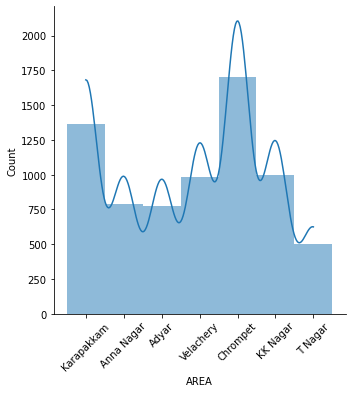

In [27]:
sns.displot(df.AREA,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

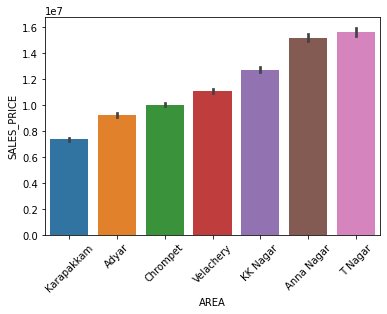

In [28]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(data=df,x='AREA',y='SALES_PRICE',order=area_order)
plt.xticks(rotation=45)

* There is a linear relations betwen 'AREA' Feature and 'SALES_PRICE' Target.
* we will do for label encoding for this column
* This Feature will help in model fit


Checking relationship in between the 'SALE_COND' FEATURE and 'SALE_PRICE' Target columns

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

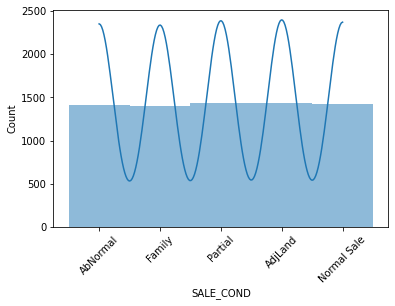

In [29]:
sns.histplot(df.SALE_COND,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

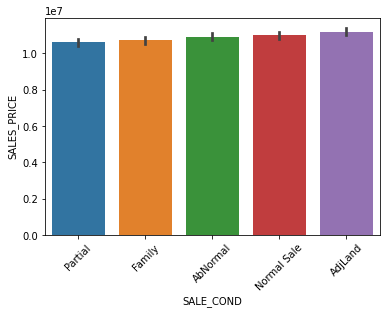

In [30]:
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=sale_cond_order)
plt.xticks(rotation=45)

* In SALE_COND(Sale condition) columns all categories uniformly distributed.
* There is no Linear Relationship between in SALE_COND AND SALE_PREICE columns,Therefore we need to drop this feature  

Checking relationship in between the 'PARK_FACIL' FEATURE and 'SALE_PRICE' Target columns

([0, 1], <a list of 2 Text major ticklabel objects>)

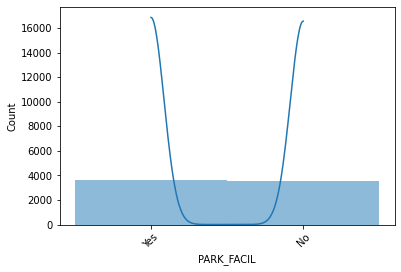

In [31]:
sns.histplot(df.PARK_FACIL,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

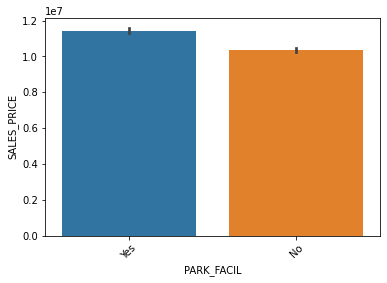

In [32]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=45)

* Houses having Parking Facilites are more expensive than the house with no parking facility.
* There is a linear relations betwen 'PARK_FACIL' Feature and 'SALES_PRICE' Target
* We will do label encoding for this column
* This Feature will help in model fit

Checking relationship in between the 'BULIDTYPE' FEATURE and 'SALE_PRICE' Target columns

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

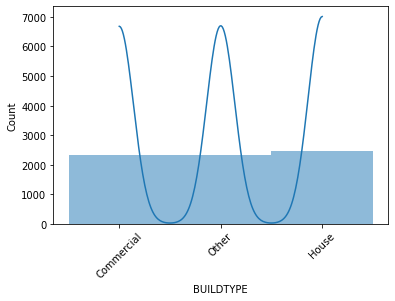

In [33]:
sns.histplot(df.BUILDTYPE,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

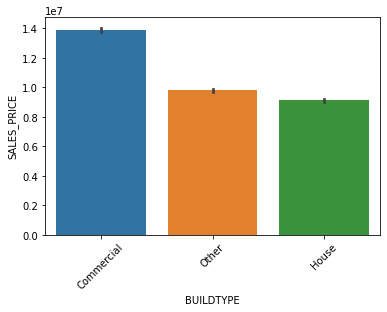

In [34]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,)
plt.xticks(rotation=45)

* Commerical bulidings are expensive than the other type of buliding.
* There is a linear relations betwen 'BUILDTYPE' Feature and 'SALES_PRICE' Target,But there is no linear Relations in between in these feature, therefore will do ONE HOT ENCODING for BUILDTYPE columns.
* will keep this feature as it is.


Checking relationship in between the 'UTILITY_AVAIL
' FEATURE and 'SALE_PRICE' Target columns

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

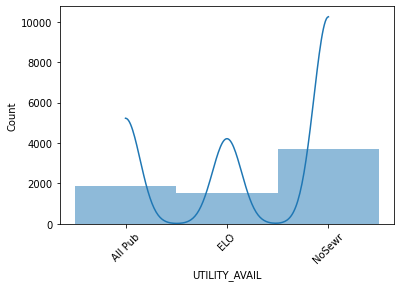

In [35]:
sns.histplot(df.UTILITY_AVAIL,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

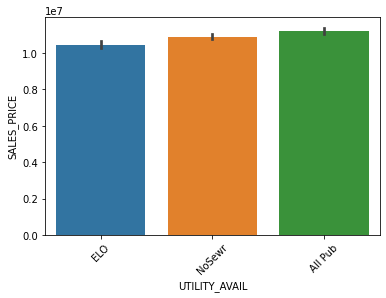

In [36]:
utility_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=utility_order)
plt.xticks(rotation=45)

* There is a linear relations between 'UTILITY_AVAIL' Feature and 'SALES_PRICE' Target.
* We will do label encoding for this column

Checking relationship in between the 'STREET' FEATURE and 'SALE_PRICE' Target columns

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

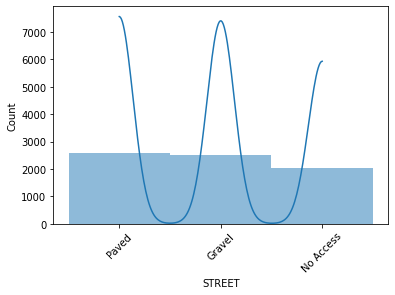

In [37]:
sns.histplot(df.STREET,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

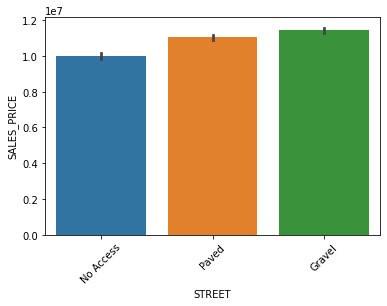

In [38]:
area_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=area_order)
plt.xticks(rotation=45)

* There is a linear relations between 'UTILITY_AVAIL' Feature and 'SALES_PRICE' Target.
* We will do label encoding for this column

Checking Relationship in between MZZON Feature and SALES_PRICE Target Columns.

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

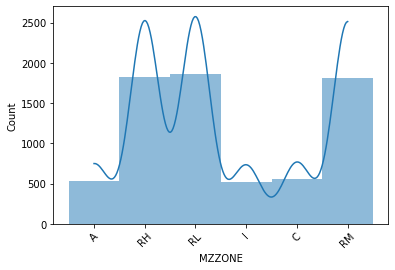

In [39]:
sns.histplot(df.MZZONE,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

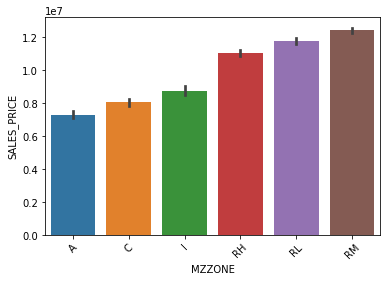

In [40]:
area_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=area_order)
plt.xticks(rotation=45)


*   There is a linear relations between 'MZZONE' Feature and 'SALES_PRICE' Target.
* We will do label encoding for this column


EDA For Numerical Columns

Checking relationship in between the 'INT_SQFT' FEATURE and 'SALE_PRICE' Target columns

(array([ 250.,  500.,  750., 1000., 1250., 1500., 1750., 2000., 2250.,
        2500., 2750.]), <a list of 11 Text major ticklabel objects>)

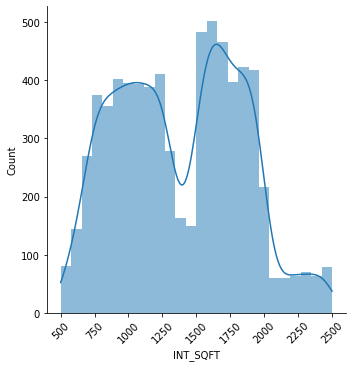

In [41]:
sns.displot(df.INT_SQFT,linewidth=0,kde=True)
plt.xticks(rotation=45)

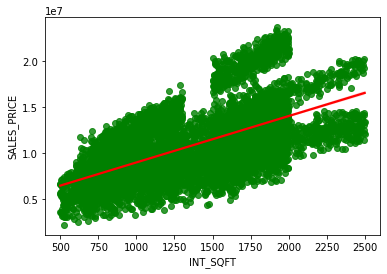

In [42]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'green'},line_kws={'color':'red'})

* There is a linear relations betwen 'INT_SQFT' Feature and 'SALES_PRICE' Target.
*This Feature is very important to keep it for furthur process.

Checking relationship in between the 'DIST_MAINROAD' FEATURE and 'SALE_PRICE' Target columns

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

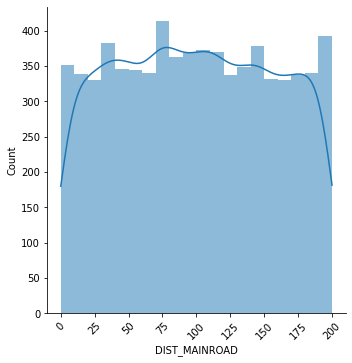

In [43]:
sns.displot(df.DIST_MAINROAD,linewidth=0,kde=True)
plt.xticks(rotation=45)

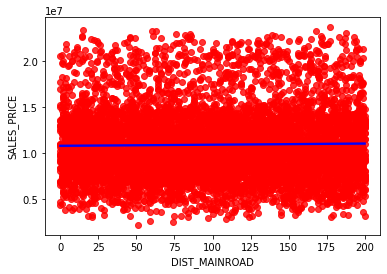

In [44]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

* There is no Linear Releation in between DIST_MAINROAD FEATURE and SALES_PRICE Target.
* we need to drop this feature for model.

Checking relationship in between the 'N_BEDROOM' FEATURE and 'SALE_PRICE' Target columns

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 9 Text major ticklabel objects>)

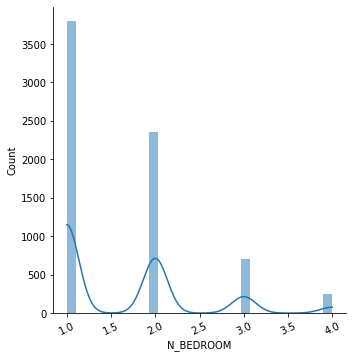

In [45]:
sns.displot(df.N_BEDROOM,linewidth=0,kde=True)
plt.xticks(rotation=25)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

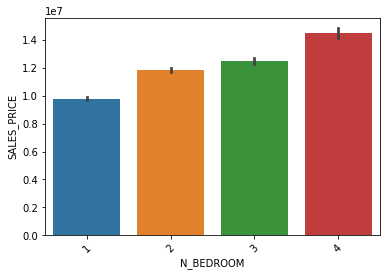

In [46]:
bedroom_order = df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df,order=bedroom_order)
plt.xticks(rotation=45)

* There is a linear relations betwen 'BEDROOM' Feature and 'SALES_PRICE' Target.
* This Feature will help in model fit

Checking relationship in between the 'N_BATHROOM' FEATURE and 'SALE_PRICE' Target columns

(array([0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2]),
 <a list of 8 Text major ticklabel objects>)

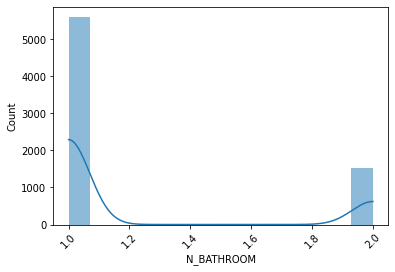

In [47]:
sns.histplot(df.N_BATHROOM,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

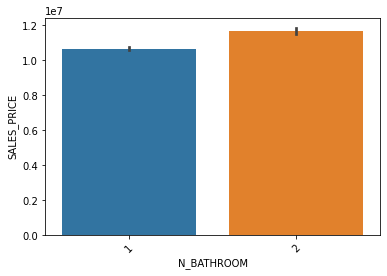

In [48]:
bathroom_order = df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM']
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df,order=bathroom_order)
plt.xticks(rotation=45)

* There is a linear relations betwen 'BATHROOM' Feature and 'SALES_PRICE' Target
* This Feature will help in model fit

Checking relationship in between the 'N_ROOM' FEATURE and 'SALE_PRICE' Target columns

(array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5]),
 <a list of 11 Text major ticklabel objects>)

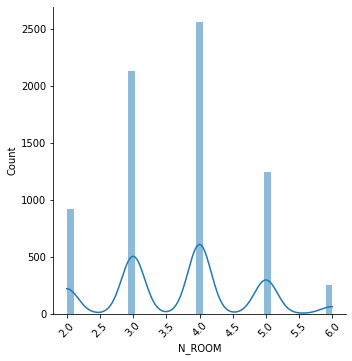

In [49]:
sns.displot(df.N_ROOM,linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

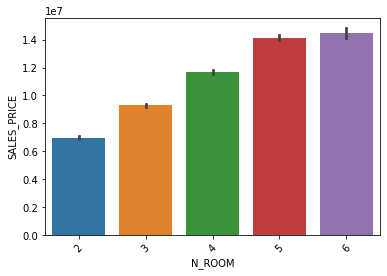

In [50]:
room_order = df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM']
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df,order=room_order)
plt.xticks(rotation=45)

N_ROOM increase then the SALES_PRICE is automatically increase.
* There is a linear relations betwen 'N_ROOM' Feature and 'SALES_PRICE' Target
* This Feature will help in model fit


Checking relationship in between the 'QS_ROOM' FEATURE and 'SALE_PRICE' Target columns

(array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 9 Text major ticklabel objects>)

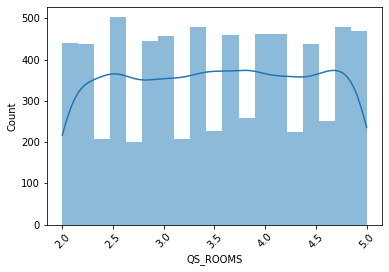

In [51]:
sns.histplot(df.QS_ROOMS,linewidth=0,kde=True)
plt.xticks(rotation=45)

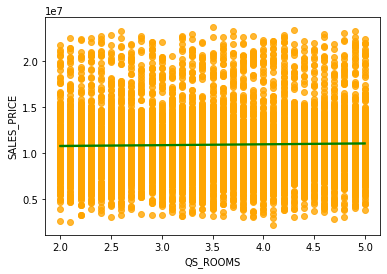

In [52]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is no Linear Releation in between QS_ROOMS Feature and SALES_PRICE Target.
* we need to drop this feature for model.
 



Checking relationship in between the 'QS_BATHROOM' FEATURE and 'SALE_PRICE' Target columns

(array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 9 Text major ticklabel objects>)

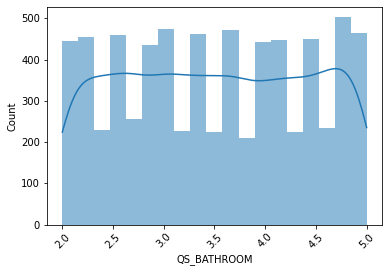

In [53]:
sns.histplot(df.QS_BATHROOM,linewidth=0,kde=True)
plt.xticks(rotation=45)

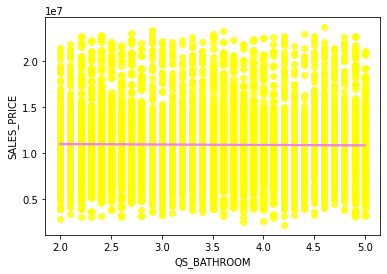

In [54]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'yellow'},line_kws={'color':'violet'})

* There is no Linear Releation in between QS_BATHROOM Feature and SALES_PRICE Target.
* we need to drop this feature for model.

Checking relationship in between the 'QS_BEDROOM' FEATURE and 'SALE_PRICE' Target columns

(array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 9 Text major ticklabel objects>)

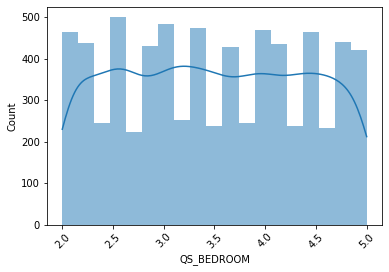

In [55]:
sns.histplot(df.QS_BEDROOM,linewidth=0,kde=True)
plt.xticks(rotation=45)

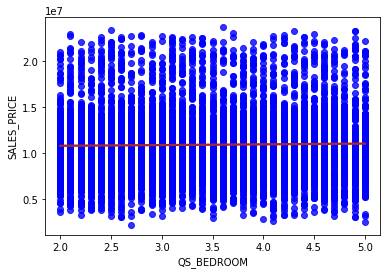

In [56]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'blue'},line_kws={'color':'brown'})

* There is no Linear Releation in between QS_BEDROOM Feature and SALES_PRICE Target.
* we need to drop this feature for model.

Checking relationship in between the 'QS_OVERALL' FEATURE and 'SALE_PRICE' Target columns

(array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 9 Text major ticklabel objects>)

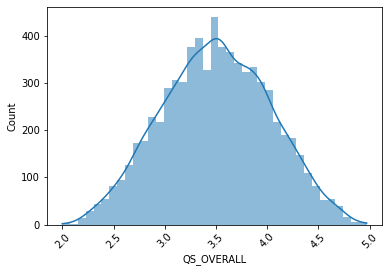

In [57]:
sns.histplot(df.QS_OVERALL,linewidth=0,kde=True)
plt.xticks(rotation=45)

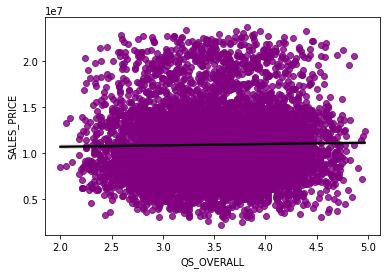

In [58]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'purple'},line_kws={'color':'black'})

* There is no Linear Releation in between QS_OVERALL Feature and SALES_PRICE Target.
* we need to drop this feature for model.


Checking relationship in between the 'BULIDING_AGE' FEATURE and 'SALE_PRICE' Target columns

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

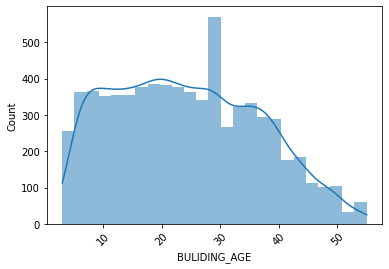

In [59]:
sns.histplot(df.BULIDING_AGE,linewidth=0,kde=True)
plt.xticks(rotation=45)

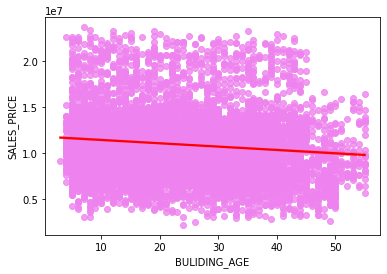

In [60]:
sns.regplot(x='BULIDING_AGE',y='SALES_PRICE',data=df,scatter_kws={'color':'violet'},line_kws={'color':'red'})

* There is Negative Linear Releation in between BULIDING_AGE Feature and SALES_PRICE Target.
*  The Feature will leave this as it is,It will be helpful further process. 

Just Seeing the Target Feature here as a visualization view

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.]),
 <a list of 6 Text major ticklabel objects>)

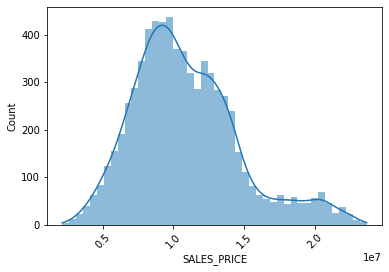

In [61]:
sns.histplot(df.SALES_PRICE,linewidth=0,kde=True)
plt.xticks(rotation=45)

 **insight from Analysis** 
* The distribution of the data in all the columns are normally distributed. In some columns only the data is very slightly skewed.
* INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM Features having strong relationship with SALES_PRICES Target. Thes features are very important to train the model.
* SALE_COND, DIST_MAINROAD, QS_ROOMS, QS_BATHROOM,QSBEDROOM, QS_OVERALL has no relationship with SALES_PRICE Target.Therefore,will drop all these features.

**Encoding**

Categorical Columns are changing to correct format as a Numerical columns using with Encoding method.

Label Encoding

In [62]:
df['AREA']=df.AREA.map({'Karapakkam':0,'Anna Nagar':1,'Adyar':2,'Velachery':3,'Chrompet':4,'KK Nagar':5,'T Nagar':'6'})

In [63]:
df['PARK_FACIL']=df.PARK_FACIL.map({'Yes':1,'No':0})

In [64]:
df['UTILITY_AVAIL']=df.UTILITY_AVAIL.map({'All Pub':1,'ELO':2,'NoSewr':3})

In [65]:
df['STREET']=df.STREET.map({'Paved':1,'Gravel':2,'No Access':3})

In [66]:
df['MZZONE']=df.MZZONE.map({'A':0,'RH':1,'RL':2,'I':3,'C':4,'RM':5})

In [67]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BULIDING_AGE
0,0,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,Commercial,1,1,0,4.0,3.9,4.9,4.330,7600000,44
1,1,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,Commercial,1,2,1,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012-04-02,70,1,1,3,AbNormal,1,1992-09-02,Commercial,2,2,2,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,Other,3,1,3,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,Other,1,2,4,3.0,2.5,4.1,3.290,7406250,30


ONE HOT ENCODING

In [68]:
dummies=pd.get_dummies(df.BUILDTYPE)
dummies.head()

,Commercial,House,Other
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


AFTER COMPLETE ONE HOT ENCODING DUMMIES FILE CONCATENATE WITH ORIGINAL FILE

In [69]:
df=pd.concat([df,dummies],axis=1)

In [70]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BULIDING_AGE,Commercial,House,Other
0,0,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,...,0,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,1,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,...,1,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,2012-04-02,70,1,1,3,AbNormal,1,1992-09-02,...,2,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,3,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,...,3,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,0,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,...,4,3.0,2.5,4.1,3.290,7406250,30,0,0,1


In [71]:
df.rename(columns={"Commercial": "BUILDTYPE_COMMERCIAL", "House": "BUILDTYPE_HOUSE",'Other':'BUILDTYPE_OTHER','BULDING_AGE':'BUILDING_AGE'},inplace=True)

In [72]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BULIDING_AGE,BUILDTYPE_COMMERCIAL,BUILDTYPE_HOUSE,BUILDTYPE_OTHER
0,0,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,...,0,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,1,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,...,1,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,2012-04-02,70,1,1,3,AbNormal,1,1992-09-02,...,2,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,3,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,...,3,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,0,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,...,4,3.0,2.5,4.1,3.290,7406250,30,0,0,1


Now Drop the UnNeccessary columns

In [73]:
df.drop(['DATE_SALE','DIST_MAINROAD','SALE_COND','DATE_BUILD', 'BUILDTYPE','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],axis=1,inplace=True)

In [74]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BULIDING_AGE,BUILDTYPE_COMMERCIAL,BUILDTYPE_HOUSE,BUILDTYPE_OTHER
0,0,1004,1,1,3,1,1,1,0,7600000,44,1,0,0
1,1,1986,2,1,5,0,1,2,1,21717770,11,1,0,0
2,2,909,1,1,3,1,2,2,2,13159200,20,1,0,0
3,3,1855,3,2,5,0,3,1,3,9630290,22,0,0,1
4,0,1226,1,1,3,1,1,2,4,7406250,30,0,0,1


In [75]:
df.AREA=df.AREA.astype('int')

In [76]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
BULIDING_AGE            int64
BUILDTYPE_COMMERCIAL    uint8
BUILDTYPE_HOUSE         uint8
BUILDTYPE_OTHER         uint8
dtype: object

In [77]:
x=df.drop('SALES_PRICE',axis=1)
x.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BULIDING_AGE,BUILDTYPE_COMMERCIAL,BUILDTYPE_HOUSE,BUILDTYPE_OTHER
0,0,1004,1,1,3,1,1,1,0,44,1,0,0
1,1,1986,2,1,5,0,1,2,1,11,1,0,0
2,2,909,1,1,3,1,2,2,2,20,1,0,0
3,3,1855,3,2,5,0,3,1,3,22,0,0,1
4,0,1226,1,1,3,1,1,2,4,30,0,0,1


In [78]:
y=df['SALES_PRICE']
y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

Splitting data as a Train Data and Test Data using with Train_Test_Split Method.

Splitting.

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

Scaling the data.

In [80]:
scaler = StandardScaler() 
scaler.fit(x_train,y_train) 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Model Fitting.**

## Linear Regression Algorithm

Fitting the Model

In [81]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

Predicting values

In [82]:
y_pred=model.predict(x_test_scaled)
y_pred

array([11212374.87028538, 13142541.23887028, 14129672.30917396, ...,
        7191327.79456052,  9678535.14389177, 15364182.05902148])

Evaluation Metric R2 Score.

In [83]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8668473591354626


## K Nearest Neighbours Alogrithm (KNN)

Hyperparameter Tuning based on K-values,Fitting the Model

In [84]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) 
  knn.fit(x_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(x_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, x_train_scaled, y_train, cv=10)))




K value  :  1  train score :  0.9999971391844843  score :  0.9084756940164231
K value  :  2  train score :  0.9781347814447279  score :  0.9224472494465937
K value  :  3  train score :  0.9675415908329379  score :  0.9255378679458184
K value  :  4  train score :  0.9595973003930056  score :  0.9241679002973553
K value  :  5  train score :  0.9534976955728605  score :  0.9218707662982
K value  :  6  train score :  0.9486690070833685  score :  0.9187701530703091
K value  :  7  train score :  0.943147753967191  score :  0.9151380414073647
K value  :  8  train score :  0.9387597603725626  score :  0.9113000617237381
K value  :  9  train score :  0.9338942033202527  score :  0.907271997276692
K value  :  10  train score :  0.9291431161260085  score :  0.9033119363969837
K value  :  20  train score :  0.892831944149165  score :  0.8719680185137658
K value  :  50  train score :  0.8327302118443671  score :  0.8195295583510325


scoring the model-R2 score with best hyperparameter

In [85]:
 knn = KNeighborsRegressor(2) 
 knn.fit(x_train_scaled,y_train) 
 knn.score(x_test_scaled,y_test)

0.9404638437137571

## Decision Tree Regressor Algorithm

Fitting the Model

In [165]:
dt=DecisionTreeRegressor(max_depth=15,max_features='auto')
dt.fit(x_train_scaled,y_train)

DecisionTreeRegressor(max_depth=15, max_features='auto')

Predicting values

In [166]:
y_pred=dt.predict(x_test_scaled)
y_pred

array([10561493.33333333, 14292780.        , 13344696.66666667, ...,
        7074750.        ,  9646825.        , 13982960.        ])

Evaluation Metric R2 Score.

In [167]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9687255622666248


## Random Forest Regressor Algorithm

Fitting the Model

In [147]:
rfr=RandomForestRegressor(n_estimators=100,max_depth=15,max_features='auto')
rfr.fit(x_train_scaled,y_train)


RandomForestRegressor(max_depth=15)

Predicting Values

In [148]:
y_pred=rfr.predict(x_test_scaled)
y_pred

array([10340522.30143579, 13799035.01071429, 13121216.4977381 , ...,
        6656636.66666667,  9369767.03970772, 14509605.87024253])

Evaluation Metric R2 Score.

In [149]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9854710851894488


## XG Boost Algorithm

Tuning based on the learning rate, Fitting the model.

In [92]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train_scaled,y_train) 
  model.score(x_test_scaled, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(x_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.4512352456366908  Cross-Val score :  -0.45823176170244617
Learning rate :  0.02  Train score :  0.7007814974015283  Cross-Val score :  0.6963201506216711
Learning rate :  0.03  Train score :  0.8950626841067024  Cross-Val score :  0.8902503134644224
Learning rate :  0.04  Train score :  0.9407174231653423  Cross-Val score :  0.9368798194818272
Learning rate :  0.05  Train score :  0.9592667523443561  Cross-Val score :  0.9558575062838681
Learning rate :  0.06  Train score :  0.9707551416690214  Cross-Val score :  0.9671146011855558
Learning rate :  0.07  Train score :  0.9770880151963925  Cross-Val score :  0.9740501930620417
Learning rate :  0.08  Train score :  0.9822516469795272  Cross-Val score :  0.9790563290437924
Learning rate :  0.09  Train score :  0.9852587042327853  Cross-Val score :  0.9825495501320312
Learning rate :  0.1  Train score :  0.9877788096116747  Cross-Val score :  0.984868104050858
Learning rate :  0.11  Train score :  0

calculating score - R2-score

In [93]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(x_train_scaled,y_train) 
model.score(x_test_scaled, y_test)

[09:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9930703086265772

 **R2-scores for all**

* LinearRegression : R2 - SCORE: 0.8668473591354626.
* KNearNeighbourRegressor : R2 - SCORE: 0.9404638437137571
* DecisionTreeRegressor : R2- SCORE: 0.9687255622666248
* RandomForestRegressor : R2- SCORE: 0.9854710851894488
* XGBoostRegressor : R2 - SCORE:0.9930703086265772